# Klasifikasi Predikat Nilai Siswa Sekolah Dasar
Notebook ini berisi tahapan pembuatan machine learning untuk memprediksi predikat siswa dalam matapelajaran IPA pada sekolah dasar menggunakan algoritma PCA dan Logistic Regression untuk classifiernya.

Tahapan:

1.   Data Preprocessing
2.   Modelling
3.   Predection




# Import Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_excel('/content/drive/MyDrive/Skripsi/DataNilai.xlsx')

In [ ]:
train.head()

,NAMA,JENIS KELAMIN,KELAS,JUMLAH TIDAK HADIR,PEKERJAAN AYAH,PEKERJAAN IBU,JARAK RUMAH,NILAI SYUKUR,NILAI IBADAH,NILAI TOLERANSI,...,TC,GC,FP1,FP2,FP3,FP4,FP5,FP6,TP,GP
0,ARYASETYO PRAMONO,1,4,1,1.0,1.0,5,3.0,3.0,3.0,...,90.602564,B,95.00,89.333333,88.0,NaN,NaN,NaN,90.777778,B
1,BETHANIA JOVELIN THIRZA SIHOTANG,2,4,1,10.0,10.0,2,4.0,3.0,3.0,...,90.277778,B,87.50,90.000000,90.0,NaN,NaN,NaN,89.166667,B
2,DANISH GI ANNAIS DALIMUNTHE,1,4,1,8.0,9.0,2,3.0,2.0,3.0,...,85.666667,B,86.25,86.666667,85.0,NaN,NaN,NaN,85.972222,B
3,DARIEL SYAWAL FIANKA PUTRA,1,4,1,9.0,10.0,5,3.0,3.0,3.0,...,91.888889,A,87.00,88.333333,90.0,NaN,NaN,NaN,88.444444,B
4,HASNA NABILA KAYNA SIREGAR,2,4,1,10.0,10.0,1,3.0,3.0,3.0,...,90.217949,B,87.00,88.333333,90.0,NaN,NaN,NaN,88.444444,B


# Data Preprocessing

## Drop Kolom

Drop kolom nama dan kelas karena tidak dibutuhkan untuk klasifikasi

In [ ]:
train = train.drop(['NAMA', 'KELAS'], axis = 1)

## Missing value

### Cek missing value pada data

In [ ]:
train.isnull().sum()

JENIS KELAMIN             0
JUMLAH TIDAK HADIR        0
PEKERJAAN AYAH           41
PEKERJAAN IBU            40
JARAK RUMAH               0
NILAI SYUKUR              0
NILAI IBADAH              0
NILAI TOLERANSI           0
NILAI BERDOA              0
NILAI JUJUR               0
NILAI DISIPLIN            0
NILAI TANGGUNG JAWAB      0
NILAI SANTUN              0
NILAI PEDULI              0
NILAI PERCAYA DIRI        0
NILAI KERJASAMA           0
Ekskul 1                  0
PRE                       0
Ekskul 2                  4
PRE.1                     4
Ekskul 3                 47
PRE.2                    47
Ekskul 4                 97
PRE.3                    97
Ekskul 5                105
PRE.4                   105
FC1                       0
FC2                       0
FC3                       1
FC4                      20
FC5                      38
FC6                      68
FC7                      88
FC8                      88
SC1                       0
SC2                 

### Mengisi missing value

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   JENIS KELAMIN         106 non-null    int64  
 1   JUMLAH TIDAK HADIR    106 non-null    int64  
 2   PEKERJAAN AYAH        65 non-null     float64
 3   PEKERJAAN IBU         66 non-null     float64
 4   JARAK RUMAH           106 non-null    int64  
 5   NILAI SYUKUR          106 non-null    float64
 6   NILAI IBADAH          106 non-null    float64
 7   NILAI TOLERANSI       106 non-null    float64
 8   NILAI BERDOA          106 non-null    float64
 9   NILAI JUJUR           106 non-null    float64
 10  NILAI DISIPLIN        106 non-null    float64
 11  NILAI TANGGUNG JAWAB  106 non-null    int64  
 12  NILAI SANTUN          106 non-null    int64  
 13  NILAI PEDULI          106 non-null    int64  
 14  NILAI PERCAYA DIRI    106 non-null    int64  
 15  NILAI KERJASAMA       1

Mengisi missing value data kategorikal menggunakan modus

In [ ]:
train['PEKERJAAN AYAH'] = train['PEKERJAAN AYAH'].fillna((train['PEKERJAAN AYAH'].mode()).iloc[0])
train['PEKERJAAN IBU'] = train['PEKERJAAN IBU'].fillna((train['PEKERJAAN IBU'].mode()).iloc[0])
train['Ekskul 2'] = train['Ekskul 2'].fillna((train['Ekskul 2'].mode()).iloc[0])
train['PRE.1'] = train['PRE.1'].fillna((train['PRE.1'].mode()).iloc[0])
train['Ekskul 3'] = train['Ekskul 3'].fillna((train['Ekskul 3'].mode()).iloc[0])
train['PRE.2'] = train['PRE.2'].fillna((train['PRE.2'].mode()).iloc[0])
train['Ekskul 4'] = train['Ekskul 4'].fillna((train['Ekskul 4'].mode()).iloc[0])
train['PRE.3'] = train['PRE.3'].fillna((train['PRE.3'].mode()).iloc[0])
train['Ekskul 5'] = train['Ekskul 5'].fillna((train['Ekskul 5'].mode()).iloc[0])
train['PRE.4'] = train['PRE.4'].fillna((train['PRE.4'].mode()).iloc[0])

In [ ]:
#cek perubahan missing value pada data tipe kategorikal
train.isnull().sum()

JENIS KELAMIN            0
JUMLAH TIDAK HADIR       0
PEKERJAAN AYAH           0
PEKERJAAN IBU            0
JARAK RUMAH              0
NILAI SYUKUR             0
NILAI IBADAH             0
NILAI TOLERANSI          0
NILAI BERDOA             0
NILAI JUJUR              0
NILAI DISIPLIN           0
NILAI TANGGUNG JAWAB     0
NILAI SANTUN             0
NILAI PEDULI             0
NILAI PERCAYA DIRI       0
NILAI KERJASAMA          0
Ekskul 1                 0
PRE                      0
Ekskul 2                 0
PRE.1                    0
Ekskul 3                 0
PRE.2                    0
Ekskul 4                 0
PRE.3                    0
Ekskul 5                 0
PRE.4                    0
FC1                      0
FC2                      0
FC3                      1
FC4                     20
FC5                     38
FC6                     68
FC7                     88
FC8                     88
SC1                      0
SC2                      0
TC                       0
G

Mengisi missing value data numerik dengan mean

In [ ]:
train['FC3'] = train["FC3"].fillna(train['FC3'].mean())
train['FC4'] = train["FC4"].fillna(train['FC4'].mean())
train['FC5'] = train["FC5"].fillna(train['FC5'].mean())
train['FC6'] = train["FC6"].fillna(train['FC6'].mean())
train['FC7'] = train["FC7"].fillna(train['FC7'].mean())
train['FC8'] = train["FC8"].fillna(train['FC8'].mean())
train['FP3'] = train["FP3"].fillna(train['FP3'].mean())
train['FP4'] = train["FP4"].fillna(train['FP4'].mean())
train['FP5'] = train["FP5"].fillna(train['FP5'].mean())
train['FP6'] = train["FP6"].fillna(train['FP6'].mean())

cek missing value yang sudah diatasi

In [ ]:
train.isnull().sum()

JENIS KELAMIN           0
JUMLAH TIDAK HADIR      0
PEKERJAAN AYAH          0
PEKERJAAN IBU           0
JARAK RUMAH             0
NILAI SYUKUR            0
NILAI IBADAH            0
NILAI TOLERANSI         0
NILAI BERDOA            0
NILAI JUJUR             0
NILAI DISIPLIN          0
NILAI TANGGUNG JAWAB    0
NILAI SANTUN            0
NILAI PEDULI            0
NILAI PERCAYA DIRI      0
NILAI KERJASAMA         0
Ekskul 1                0
PRE                     0
Ekskul 2                0
PRE.1                   0
Ekskul 3                0
PRE.2                   0
Ekskul 4                0
PRE.3                   0
Ekskul 5                0
PRE.4                   0
FC1                     0
FC2                     0
FC3                     0
FC4                     0
FC5                     0
FC6                     0
FC7                     0
FC8                     0
SC1                     0
SC2                     0
TC                      0
GC                      0
FP1         

## Data duplikat

In [ ]:
print(train.duplicated().sum())
train.drop_duplicates(inplace=True)
print(train.duplicated().sum())

0
0


## Outlier

menghapus data yang terindikasi sebagai outlier, yang memiliki nilai standar deviasi lebih dari 3 mengunakan metode z score

In [ ]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(train)}')

filtered_entries = np.array([True] * len(train))
for col in ['FC1','FC2','FC3','FC4','FC5','FC6','FC7','FC8','SC1','SC2','TC','FP1','FP2','FP3','FP4','FP5','FP6']:
    zscore = abs(stats.zscore(train[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
train = train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(train)}')

Jumlah baris sebelum memfilter outlier: 106
Jumlah baris setelah memfilter outlier: 93


## Encoding

encoding data menggunakan label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

train = train.apply(LabelEncoder().fit_transform)
train.head()

,JENIS KELAMIN,JUMLAH TIDAK HADIR,PEKERJAAN AYAH,PEKERJAAN IBU,JARAK RUMAH,NILAI SYUKUR,NILAI IBADAH,NILAI TOLERANSI,NILAI BERDOA,NILAI JUJUR,...,TC,GC,FP1,FP2,FP3,FP4,FP5,FP6,TP,GP
0,0,0,0,0,4,1,1,1,1,1,...,69,1,18,12,10,7,6,1,41,1
1,1,0,3,4,1,6,1,1,1,1,...,66,1,8,14,13,7,6,1,31,1
2,0,0,1,3,1,1,0,1,1,1,...,31,1,5,6,7,7,6,1,10,1
3,0,0,2,4,4,1,1,1,1,0,...,76,0,7,10,13,7,6,1,26,1
4,1,0,3,4,0,1,1,1,1,1,...,64,1,7,10,13,7,6,1,26,1


## Split data train dan data test

In [ ]:
#Split train and evaluation set
from sklearn.model_selection import train_test_split

y = train['GC'] #dependent atau target
X = train.drop(['GC'], axis=1) #input/features/independent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

## standarisasi

In [ ]:
# Proses Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Data Reduction

### PCA

In [ ]:
# Menjalankan algoritma PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
hasil_variance = pca.explained_variance_ratio_ # Proses pengecekan variance

In [ ]:
# Proses pemilihan PCs

pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
hasil_variance2 = pca.explained_variance_ratio_

# Modelling

## Classification

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.88      0.88      0.88        17
           2       0.33      0.33      0.33         3

    accuracy                           0.86        28
   macro avg       0.74      0.74      0.74        28
weighted avg       0.86      0.86      0.86        28



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4b23cd7750>)

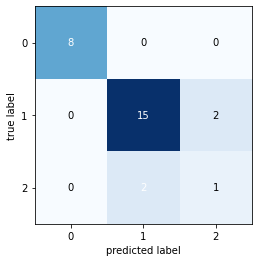

In [ ]:
# Menjalankan algoritma logistic regression ke training set
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

#fit
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

## Visualisasi

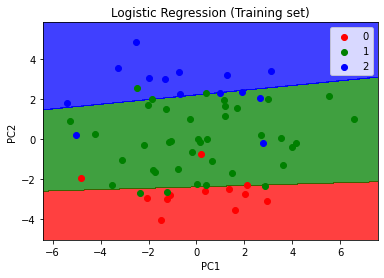

In [ ]:
# Visualisasi Training Set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

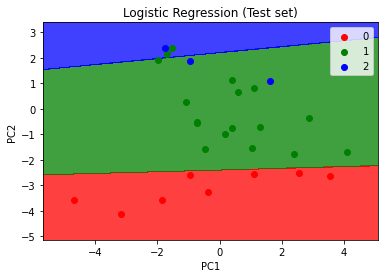

In [ ]:
# Visualisasi Test Set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()